## Gender Recognition by Voice
[Identify a voice as male or female](https://www.kaggle.com/datasets/primaryobjects/voicegender)

### Cписок столбцов и их краткое описание.
- meanfreq — средняя частота голоса спикера (в кГц);
- sd — стандартное отклонение частоты (в кГц);
- median — медианная частота (в кГц);
- Q25 — первый квартиль частоты (25-я квантиль) (в кГц);
- Q75 — третий квартиль частоты (75-я квантиль) (в кГц);
- IQR — межквартильный размах (Q75-Q25) (в кГц);
- skew — асимметрия распределения частот;
- kurt — эксцесс распределения частот;
- sp.ent — спектральная энтропия;
- sfm — спектральная равномерность;
- ode — модальная частота (наиболее популярная частота голоса);
- centroid — частотный центроид;
- peakf — пиковая частота (частота с наибольшей энергией);
- meanfun — среднее значение основной частоты, измеренной по акустическому сигналу;
- minfun — минимальное значение основной частоты, измеренной по акустическому сигналу;
- maxfun — максимальное значение основной частоты, измеренной по акустическому сигналу;
- meandom — среднее значение доминирующей частоты, измеренной по акустическому сигналу;
- mindom — минимальное значение доминирующей частоты, измеренной по акустическому сигналу;
- maxdom — максимальное значение доминирующей частоты, измеренной по акустическому сигналу;
- dfrange — диапазон доминирующей частоты, измеренный по акустическому сигналу;
- modindx — индекс модуляции;
- label — целевой признак — метка класса: male (голос принадлежит мужчине) или female (голос принадлежит женщине).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [4]:
voice_data = pd.read_csv('data/voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
# Посмотрим на типизацию признаков:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


Итак, все признаки, за исключением целевого, кодируются числовым форматом. Типизация целевой переменной не имеет значения для моделей машинного обучения в библиотеке sklearn, поэтому кодирование категориальных признаков нам не потребуется.

Заодно проверим данные на наличие пропусков:

In [8]:
voice_data.isnull().sum().sum()

0

In [13]:
X = voice_data.drop(columns='label')
y = voice_data.label

In [14]:
# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


### Задание 7.1
Начнём с решающего пня.

Создайте модель дерева решений максимальной глубины 1. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

1. На основе какого фактора будет построено решающее правило в корневой вершине?


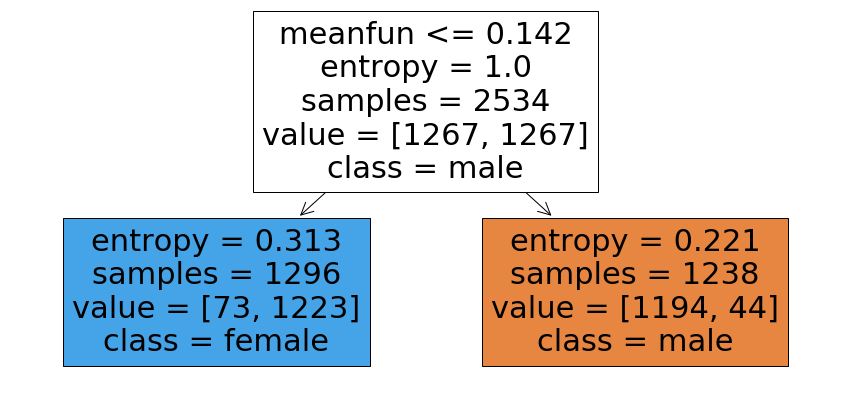

In [113]:
dt = tree.DecisionTreeClassifier(
    max_depth=1,
    criterion='entropy'
)
dt.fit(X_train, y_train)

fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=y.unique(), 
    filled=True, 
    impurity=True
)
plt.show()

2. Чему равно оптимальное пороговое значение для данного фактора? Ответ округлите до трёх знаков после точки-разделителя.

In [92]:

print(f'оптимальное пороговое значение для данного фактора {dt.tree_.threshold[0]:.3f}')

оптимальное пороговое значение для данного фактора 0.142


3. Сколько процентов наблюдений, для которых выполняется заданное в корневой вершине условие, содержится в обучающей выборке? Ответ округлите до одного знака после точки-разделителя. Не указывайте в ответе символ %.

In [93]:
ans = dt.tree_.n_node_samples[1]/dt.tree_.n_node_samples[0]
print(f'{ans*100:.1f} % наблюдений, для которых выполняется заданное в корневой вершине условие,\
содержится в обучающей выборке')

51.1 % наблюдений, для которых выполняется заданное в корневой вершине условие,содержится в обучающей выборке


4. Сделайте предсказание и рассчитайте значение метрики `accuracy` на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.

In [100]:
y_pred = dt.predict(X_test)
ans = metrics.accuracy_score(y_test,y_pred)
print(f'метрика accuracy на тестовой выборке: {ans:.3f}')

метрика accuracy на тестовой выборке: 0.956


### Задание 7.2
Увеличим глубину дерева.

Создайте дерево решений с максимальной глубиной 2. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

1. Из приведённых ниже факторов выберите те, что используются при построении данного дерева решений:

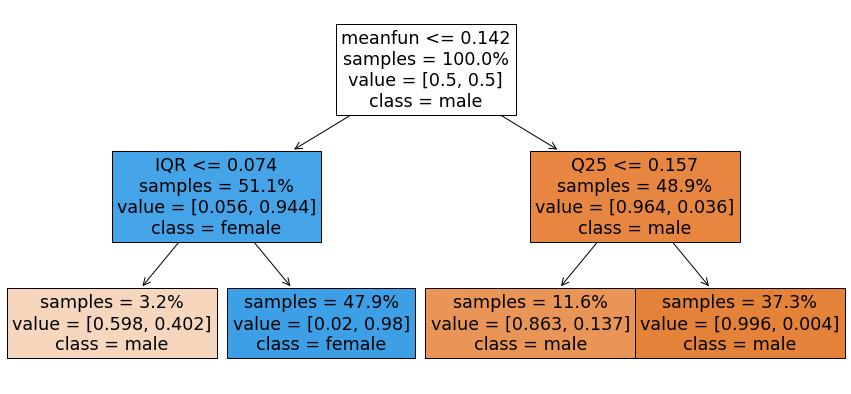

In [112]:
dt = tree.DecisionTreeClassifier(
    max_depth=2,
    criterion='entropy'
)
dt.fit(X_train, y_train)

fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=y.unique(), 
    filled=True, 
    proportion=True,
    impurity=False
)
plt.show()

2. Сколько листьев в построенном дереве содержат в качестве предсказания класс female?

3. Сделайте предсказание и рассчитайте значение метрики `accuracy` на тестовой выборке. Ответ округлите до трёх знаков после точки-разделителя.

In [111]:
y_pred = dt.predict(X_test)
ans = metrics.accuracy_score(y_test,y_pred)
print(f'метрика accuracy на тестовой выборке: {ans:.3f}')

метрика accuracy на тестовой выборке: 0.962


### Задание 7.3
Давайте дадим дереву решений полную свободу.

Создайте дерево решений, не ограничивая его максимальную глубину. В качестве критерия информативности используйте энтропию Шеннона.

В качестве значения параметра random_state возьмите 0.

Обучите модель на тренировочной выборке.

1. Чему равна глубина полученного дерева решения? Напомним, что глубину дерева можно узнать с помощью метода `get_depth()`

In [123]:
dt = tree.DecisionTreeClassifier(
    max_depth=None,
    random_state=0,
    criterion='entropy'
)
dt.fit(X_train,y_train)

print(f'Глубина полученного дерева решения {dt.get_depth()}')

Глубина полученного дерева решения 12


2. Чему равно количество листьев в полученном дереве решений? Напомним, что количество листьев можно узнать с помощью метода `get_n_leaves()`

In [124]:
print(f'Количество листьев в полученном дереве решений {dt.get_n_leaves()}')

Количество листьев в полученном дереве решений 54


3. Сделайте предсказание для обучающей и тестовой выборок и рассчитайте значение метрики accuracy на каждой из выборок. Ответы округлите до трёх знаков после точки-разделителя.

In [125]:
y_train_pred, y_test_pred = dt.predict(X_train), dt.predict(X_test)

In [131]:
accuracy_train = metrics.accuracy_score(y_train,y_train_pred)
accuracy_test = metrics.accuracy_score(y_test,y_test_pred)
print(f'accuracy train: {accuracy_train:.3f}, accuracy test: {accuracy_test:.3f}')

accuracy train: 1.000, accuracy test: 0.973


### Задание 7.4
Давайте попробуем найти оптимальные внешние параметры модели дерева решений для поставленной задачи. Воспользуемся классическим методом подбора гиперпараметров — перебором на сетке с кросс-валидацией (Grid SearchCV).

Задана следующая сетка параметров:

In [136]:
# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

В качестве кросс-валидатора будем использовать `k-fold`-валидатор со стратификацией `StratifiedKFold`:

In [137]:
# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

С помощью `Grid SearchCV` из модуля `model_selection` библиотеки `sklearn` переберите гиперпараметры дерева решений из приведённой сетки на обучающей выборке и найдите оптимальные. Параметр `random_state` для дерева решений установите равным 0. В качестве метрики качества (параметр `scoring`) используйте `accuracy`.

1. Какой критерий информативности использует наилучшая модель?

In [154]:
dt = tree.DecisionTreeClassifier(random_state=0)
search = model_selection.GridSearchCV(
    estimator = dt,
    param_grid = param_grid,
    scoring='accuracy',
    n_jobs=-1
    )
search.fit(X_train, y_train)

print(f'Критерий информативности {search.best_params_["criterion"]} использует наилучшая модель')

C:\Users\GANSOR-PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Критерий информативности entropy использует наилучшая модель


In [155]:
search.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 3}

2. Чему равна оптимальная максимальная глубина?

In [156]:
print(f'Оптимальная максимальная глубина: {search.best_params_["max_depth"]}')

Оптимальная максимальная глубина: 6


3. Чему равно оптимальное минимальное количество объектов, необходимое для разбиения?

In [157]:
print(f'Оптимальное минимальное количество объектов, необходимое для \
разбиения: {search.best_params_["min_samples_split"]}')

Оптимальное минимальное количество объектов, необходимое для разбиения: 3


4. С помощью наилучшей модели сделайте предсказание для обучающей и тестовой выборок. Рассчитайте значение метрики accuracy на каждой из выборок. Ответы округлите до трёх знаков после точки-разделителя.

In [158]:
y_train_pred = search.best_estimator_.predict(X_train)
y_test_pred = search.best_estimator_.predict(X_test)
accuracy_train = metrics.accuracy_score(y_train,y_train_pred)
accuracy_test = metrics.accuracy_score(y_test,y_test_pred)
print(f'accuracy train: {accuracy_train:.3f}, accuracy test: {accuracy_test:.3f}')

accuracy train: 0.988, accuracy test: 0.976


### Задание 7.5
Для оптимального дерева решений, построенного в задании 7.4, найдите важность каждого из факторов. Визуализируйте её в виде столбчатой диаграммы.

Выделите топ-3 наиболее важных факторов, участвующих в построении дерева решений:

In [182]:
search.best_estimator_.feature_importances_

array([0.00612925, 0.00206425, 0.0019138 , 0.02790518, 0.00843358,
       0.07221469, 0.00326451, 0.00556526, 0.00956415, 0.01007482,
       0.        , 0.00295814, 0.78585402, 0.0205308 , 0.00930412,
       0.        , 0.        , 0.        , 0.02995411, 0.00426933])

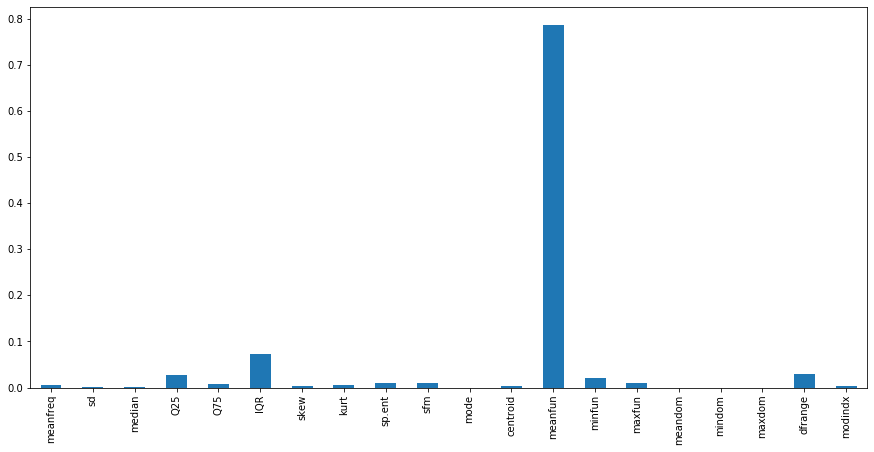

In [168]:
feat_imp = pd.Series(data=search.best_estimator_.feature_importances_,index=X.columns)

fig = plt.figure(figsize=(15, 7))
feat_imp.plot.bar()
plt.show()

In [179]:
print(*feat_imp.sort_values(ascending=False).index[:3])

meanfun IQR dfrange


In [184]:
best_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

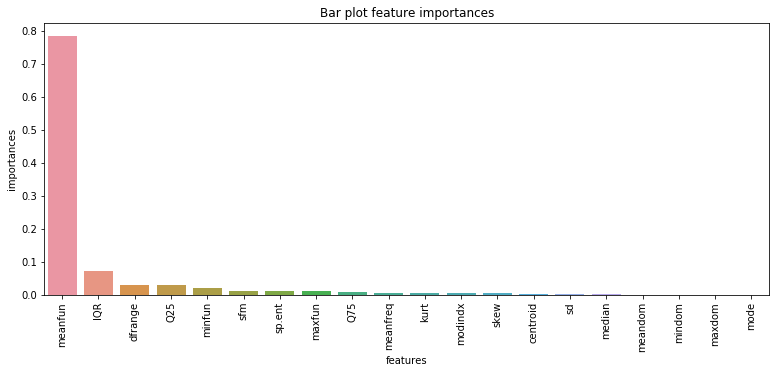

In [180]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
features = X.columns #признаки
feature_importances = best_tree.feature_importances_ #важность признаков
# Создаём DataFrame, содержащий информацию о важности признаков
importances_data = pd.DataFrame({'features': features, 'importances': feature_importances})
importances_data = importances_data.sort_values(by='importances', ascending=False)
# Строим столбчатую диаграмму
sns.barplot(data=importances_data, x='features', y='importances', ax=ax);
# Добавляем подпись к графику и поворот меток на оси абсцисс
ax.set_title('Bar plot feature importances')
ax.xaxis.set_tick_params(rotation=90)

In [186]:
importances_data

,features,importances
12,meanfun,0.785854
5,IQR,0.072215
18,dfrange,0.029954
3,Q25,0.027905
13,minfun,0.020531
9,sfm,0.010075
8,sp.ent,0.009564
14,maxfun,0.009304
4,Q75,0.008434
0,meanfreq,0.006129
